In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
from scipy import *
import scipy
from scipy import stats
import tables
import h5py

#!jt -t onedork -cellw 90%

In [2]:
uscal=500
vscal=10
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

8688000 bytes
[[3.5        3.50858949 3.51708592 ... 4.09899291 4.09899291 4.09899291]
 [3.28409864 3.29471595 3.30524794 ... 4.09899288 4.09899288 4.09899288]
 [3.06819728 3.08020801 3.09215887 ... 4.09899285 4.09899285 4.09899285]
 ...
 [1.65959133 1.65930436 1.65900979 ... 0.55955793 0.55955793 0.55955792]
 [1.65936318 1.65907017 1.6587694  ... 0.55955793 0.55955793 0.55955792]
 [1.65913023 1.65883106 1.65852396 ... 0.55955793 0.55955793 0.55955792]]
0.0
[3.53379999 3.32605266 3.11587371 ... 1.65839706 1.65814377 1.65788515]


In [39]:
print(rnputil)

M=massnp[0,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.5,1.3,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print('---')
print(M,Q,Lambda)
print('---')
print(rminus,rplus,rcosm)


['5427010000' '542701' '10000' '3.5' '0.043180272108843565' '1.0' '0.9'
 '0.1' 'True' '0.0' 'edd']
N=5427010000
---
1.0004641130051932 0.9 0.1
---
0.5597811374100254 1.6726632948546334 4.098992957500325
1086


In [6]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print('k+: '+str(kappaplus),'k-: '+str(kappaminus),'kc: '+str(kappacosm))
###double-check for Lambda=0
###kappaminus
#print(np.abs((M*rminus-Q**2)/rminus**3.0))
#print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

#print(kappaplus-kappacosm)


k+: 0.12874880779556452 k-: 1.443656880151245 kc: 0.08884909474815572


In [32]:
uval=800
print(Nu)

1086


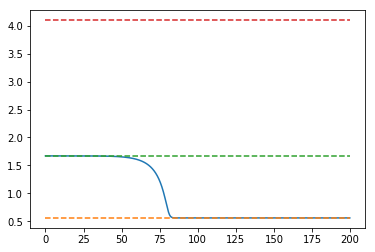

In [33]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rminus,rminus],'--')
plt.plot([min(vrange),max(vrange)],[rplus,rplus],'--')
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
#plt.ylim(rcosm-.0000001,rcosm+.0000001)
plt.show()

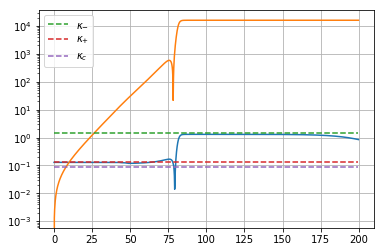

In [34]:
plt.plot(vrange,np.abs(dsignpv[uval]))
plt.plot(vrange,np.abs(dsignpu[uval]))
plt.plot([min(vrange),max(vrange)],[kappaminus,kappaminus],'--',label=r'$\kappa_{-}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label=r'$\kappa_{-}-\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
plt.plot([min(vrange),max(vrange)],[kappaplus,kappaplus],'--',label=r'$\kappa_{+}$')
plt.plot([min(vrange),max(vrange)],[kappacosm,kappacosm],'--',label=r'$\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaplus-kappacosm,kappaplus-kappacosm],'--',label=r'$\kappa_{c}$')
plt.yscale('log')
#plt.ylim(-.11,-.09)
plt.ylim()
plt.legend(loc='best')
plt.grid()
plt.show()

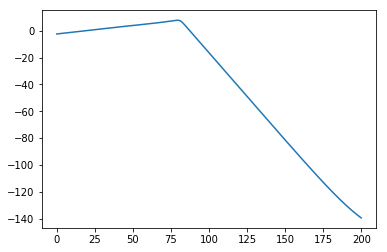

1086 1000
[-1.13328369 91.84498362]


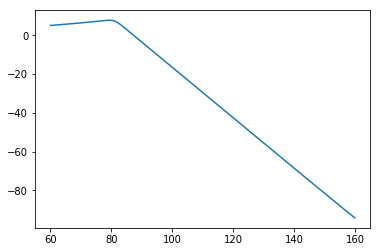

1.3028142956157212


In [35]:
plt.plot(vrange,signp[uval])
plt.show()
print(Nu,Nv)
vrange2=vrange*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
v1=300
v2=800
print(np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
plt.plot(vrange2[v1:v2],signp[uval][v1:v2])
plt.show()

print(np.abs(dsignpv[uval][int((v1+v2)/2)]))


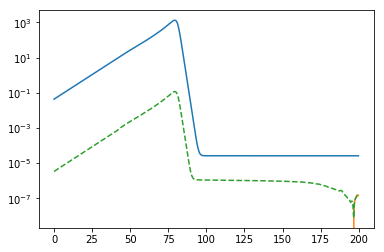

In [36]:
plt.plot(vrange2,np.abs(drnpu[uval]))
plt.plot(vrange2,drnpv[uval])
plt.plot(vrange2,np.abs(drnpv[uval]),'--')
plt.yscale('log')
plt.show()

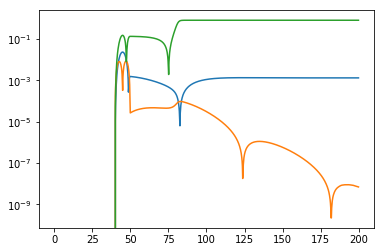

In [37]:
plt.plot(vrange,np.abs(phinp[uval]))
plt.plot(vrange,np.abs(dphinpv[uval]))
plt.plot(vrange,np.abs(dphinpu[uval]))
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()

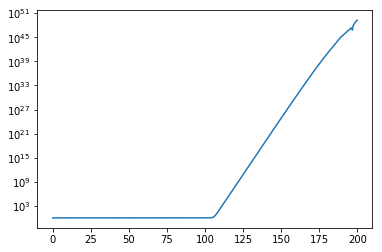

[   1.2825959  -135.14472734]


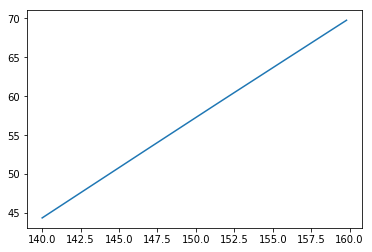

In [38]:
plt.plot(vrange,np.abs(massnp[uval]))
#plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.yscale('log')
plt.show()

v1=700
v2=800
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])))
plt.show()

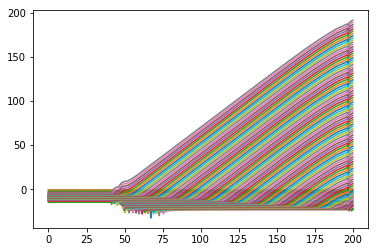

In [30]:
for i in range(int(Nu/10)):
    i2=10*i
    plt.plot(vrange,np.log(np.abs(np.exp(-signp[i2])*drnpv[i2])))
plt.show()


[  1.30074386 -55.96900122]


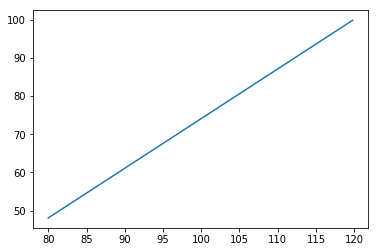

In [15]:
uval2=-1
v1=400
v2=600
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])))
plt.show()

In [16]:
print(massnp[0,-1])

1.0004641130051932


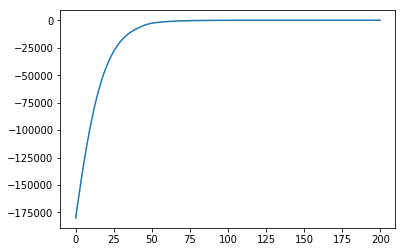

In [17]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
#print(dsignpv2)

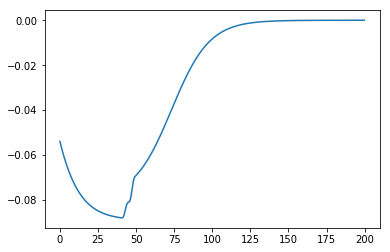

[-5.39552147e-02 -5.45029184e-02 -5.50431447e-02 -5.55759620e-02
 -5.61014390e-02 -5.66196449e-02 -5.71306494e-02 -5.76345224e-02
 -5.81313343e-02 -5.86211556e-02 -5.91040571e-02 -5.95801097e-02
 -6.00493847e-02 -6.05119532e-02 -6.09678866e-02 -6.14172563e-02
 -6.18601336e-02 -6.22965900e-02 -6.27266967e-02 -6.31505250e-02
 -6.35681460e-02 -6.39796307e-02 -6.43850500e-02 -6.47844746e-02
 -6.51779748e-02 -6.55656208e-02 -6.59474827e-02 -6.63236302e-02
 -6.66941325e-02 -6.70590588e-02 -6.74184779e-02 -6.77724580e-02
 -6.81210673e-02 -6.84643734e-02 -6.88024434e-02 -6.91353443e-02
 -6.94631425e-02 -6.97859039e-02 -7.01036940e-02 -7.04165779e-02
 -7.07246201e-02 -7.10278848e-02 -7.13264355e-02 -7.16203354e-02
 -7.19096470e-02 -7.21944325e-02 -7.24747533e-02 -7.27506704e-02
 -7.30222445e-02 -7.32895353e-02 -7.35526023e-02 -7.38115042e-02
 -7.40662995e-02 -7.43170457e-02 -7.45638001e-02 -7.48066191e-02
 -7.50455589e-02 -7.52806748e-02 -7.55120217e-02 -7.57396539e-02
 -7.59636251e-02 -7.61839

In [18]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

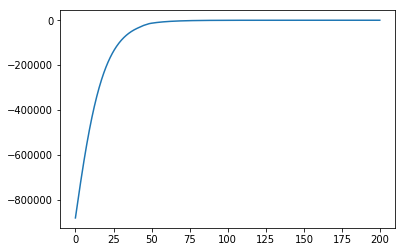

[-8.81000656e+05 -8.71506895e+05 -8.62021693e+05 -8.52548275e+05
 -8.43089778e+05 -8.33649244e+05 -8.24229623e+05 -8.14833774e+05
 -8.05464465e+05 -7.96124373e+05 -7.86816084e+05 -7.77542098e+05
 -7.68304823e+05 -7.59106583e+05 -7.49949613e+05 -7.40836065e+05
 -7.31768006e+05 -7.22747419e+05 -7.13776206e+05 -7.04856190e+05
 -6.95989111e+05 -6.87176634e+05 -6.78420347e+05 -6.69721762e+05
 -6.61082317e+05 -6.52503378e+05 -6.43986241e+05 -6.35532129e+05
 -6.27142202e+05 -6.18817549e+05 -6.10559196e+05 -6.02368106e+05
 -5.94245177e+05 -5.86191250e+05 -5.78207105e+05 -5.70293465e+05
 -5.62450995e+05 -5.54680309e+05 -5.46981964e+05 -5.39356469e+05
 -5.31804281e+05 -5.24325807e+05 -5.16921409e+05 -5.09591402e+05
 -5.02336058e+05 -4.95155603e+05 -4.88050224e+05 -4.81020067e+05
 -4.74065239e+05 -4.67185809e+05 -4.60381809e+05 -4.53653238e+05
 -4.47000060e+05 -4.40422205e+05 -4.33919574e+05 -4.27492037e+05
 -4.21139434e+05 -4.14861579e+05 -4.08658258e+05 -4.02529231e+05
 -3.96474234e+05 -3.90492

In [19]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

In [20]:
Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))

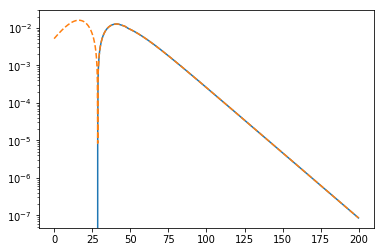

In [21]:
plt.plot(vrange2,Rfunc)
plt.plot(vrange2,np.abs(Rfunc),'--')
plt.yscale('log')
plt.show()

In [22]:
r2=1.56
print(1-Q**2.0/r2**2.0-Lambda*r2**2.0)

0.42379976331360947


In [40]:
print(urange)

[ 0.          5.         10.         ... 42.62151633 42.62680004
 42.63219478]
